<a href="https://colab.research.google.com/github/OSolerHugo/Data_science_Study/blob/main/features_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project serves as an illustrative example for the Machine Learning course titled "Dimensional Reduction" offered by Alura courses.

The dataset utilized in this project contains information about medical exams conducted on patients with cancer. The objective is to categorize the patients into two groups: those with malignant cancer and those with benign cancer. By applying dimensional reduction techniques, we aim to identify the most relevant features and optimize the classification process.

In [1]:
import pandas as pd
import numpy as np


#from google.colab import drive
#drive.mount('drive')

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

data_raw = pd.read_csv(url)

data_raw.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Firstly, I will begin the data cleaning process by addressing any null values in the dataset. This involves identifying cells that contain null values and implementing appropriate strategies to handle them. By ensuring the data is clean and complete, we can proceed with subsequent analyses and modeling tasks more effectively.

In [3]:
data_raw.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [4]:
data_raw.shape

(569, 35)

The dataset consists of 569 rows and 35 columns. Upon inspecting the data, it is observed that 419 rows contain NaN cells in the "exame_33" column. In this case, considering the high number of missing values, it would be appropriate to exclude this column from further analysis. Removing columns with a significant amount of missing data helps maintain the integrity and reliability of the dataset for subsequent analyses.

In [5]:
clean_data1 = data_raw.drop(columns="exame_33")

Now, it's time to implement the Random Forest Classifier. Before that, we need to split the data into training and testing sets. To ensure reproducibility of the results, I will set a random seed value.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 122
random.seed(SEED)

x_data = clean_data1.drop(columns=['id', 'diagnostico'])
y_data = clean_data1.diagnostico

train_x, test_x, train_y, test_y = train_test_split(x_data,
                                                       y_data,
                                                        test_size = 0.3)



classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(train_x, train_y)
print("Score of %.2f%%" %(classifier.score(test_x,test_y)*100))

Score of 96.49%


To establish a baseline, I will utilize the Dummy Classifier. This classifier allows us to determine the performance of our Random Forest Classifier model by providing a benchmark to compare against.

In [7]:
from sklearn.dummy import DummyClassifier

random.seed(SEED)

dummy_classifier = DummyClassifier(strategy= "most_frequent")
dummy_classifier.fit(train_x, train_y)
print("Score of %.2f%%" %(dummy_classifier.score(test_x, test_y)*100))

Score of 65.50%


By comparing the performance of our Random Forest Classifier model to the benchmark set by the Dummy Classifier, we can conclude that the Random Forest Classifier performs well in classifying our dataset. The results indicate that the model is effective in capturing meaningful patterns and making accurate predictions.

To study the influence of the exams on the classification of tumor types, it is important to address the variation in the ranges of values for each exam in the dataset. In order to mitigate this issue, we need to scale the features. And try some method to visualise them.

In [8]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaler.fit(x_data)

x_data2 = scaler.transform(x_data)
x_data2 = pd.DataFrame(data = x_data2,
                                columns= x_data.keys())

x_data2.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100


It is possible to plot now to visualize the data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

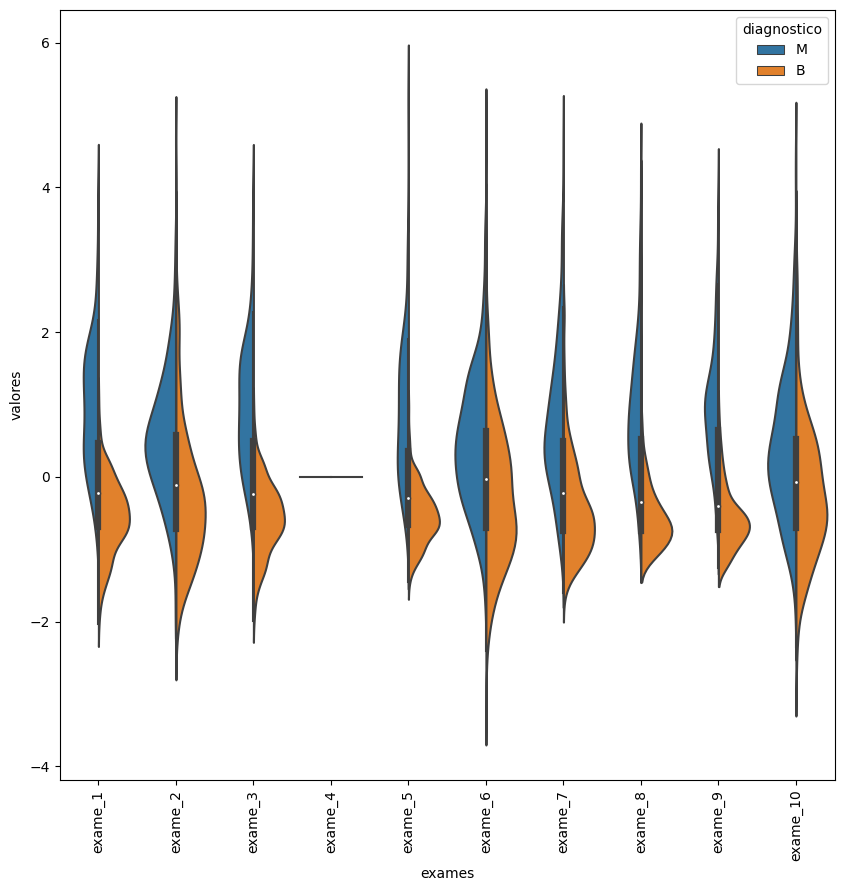

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


data_plot = pd.concat([y_data, x_data2.iloc[:,0:10]],axis = 1)
data_plot = pd.melt(data_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
plt.figure(figsize=(10, 10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = data_plot, split = True)
plt.xticks(rotation = 90)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_11'),
  Text(1, 0, 'exame_12'),
  Text(2, 0, 'exame_13'),
  Text(3, 0, 'exame_14'),
  Text(4, 0, 'exame_15'),
  Text(5, 0, 'exame_16'),
  Text(6, 0, 'exame_17'),
  Text(7, 0, 'exame_18'),
  Text(8, 0, 'exame_19'),
  Text(9, 0, 'exame_20')])

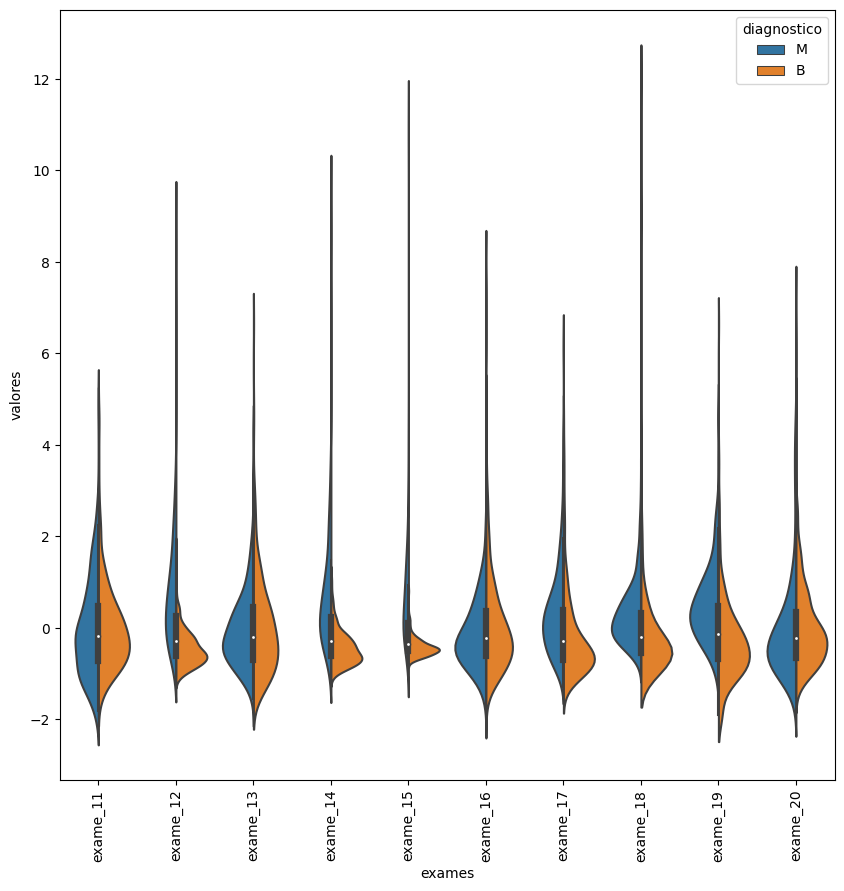

In [10]:

data_plot = pd.concat([y_data, x_data2.iloc[:,10:20]],axis = 1)
data_plot = pd.melt(data_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
plt.figure(figsize=(10, 10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = data_plot, split = True)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_21'),
  Text(1, 0, 'exame_22'),
  Text(2, 0, 'exame_23'),
  Text(3, 0, 'exame_24'),
  Text(4, 0, 'exame_25'),
  Text(5, 0, 'exame_26'),
  Text(6, 0, 'exame_27'),
  Text(7, 0, 'exame_28'),
  Text(8, 0, 'exame_29'),
  Text(9, 0, 'exame_30')])

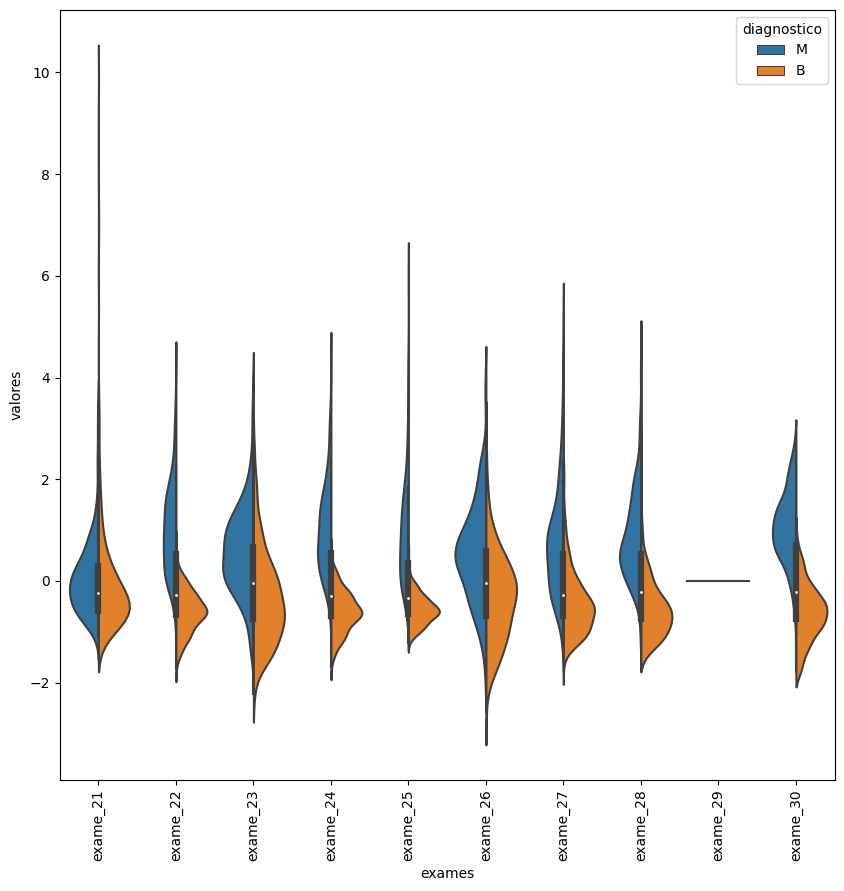

In [11]:

data_plot = pd.concat([y_data, x_data2.iloc[:,20:30]],axis = 1)
data_plot = pd.melt(data_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
plt.figure(figsize=(10, 10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = data_plot, split = True)
plt.xticks(rotation = 90)

(array([0, 1]), [Text(0, 0, 'exame_31'), Text(1, 0, 'exame_32')])

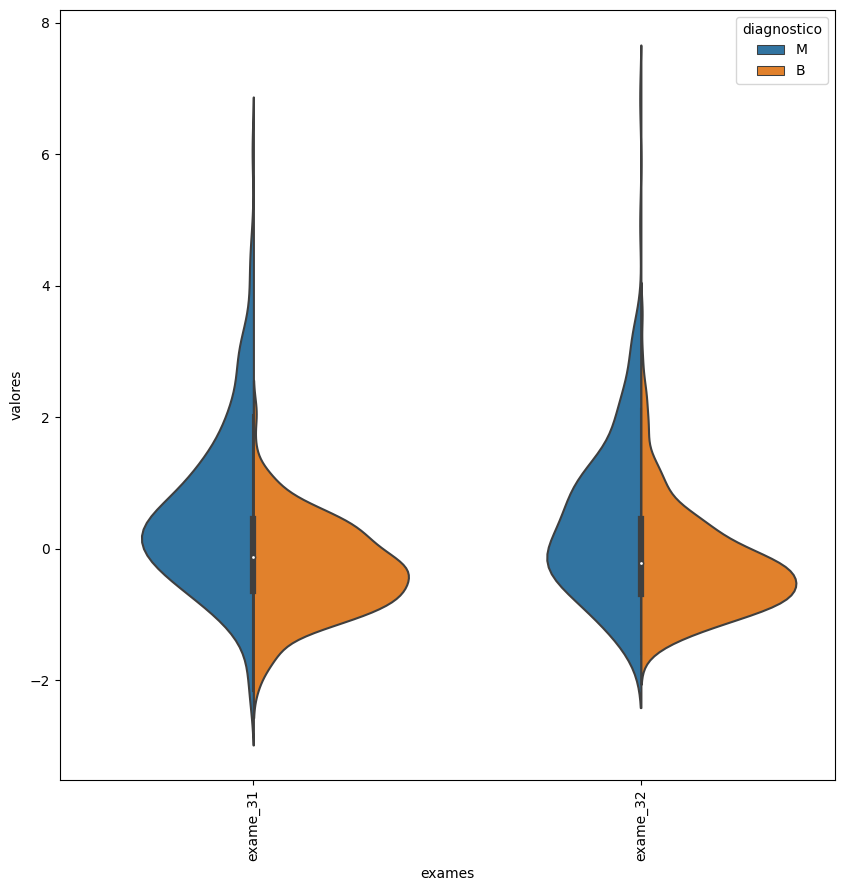

In [12]:

data_plot = pd.concat([y_data, x_data2.iloc[:,30:]],axis = 1)
data_plot = pd.melt(data_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
plt.figure(figsize=(10, 10))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = data_plot, split = True)
plt.xticks(rotation = 90)

The violin plots provide valuable insights into the distribution and variation of the features in relation to the categorization of tumors. By analyzing these plots, it becomes evident that the features "exame_4" and "exame_29" do not contribute any significant new information to the tumor classification task.


Based on the observation that the features "exame_4" and "exame_29" do not provide significant new information for tumor classification, it is reasonable to exclude these columns from the dataset. By doing so, we can retrain the model and evaluate if there is any loss in performance or accuracy. This step allows us to assess the impact of removing these features on the model's predictive power and determine if they are truly unnecessary for the classification task.

In [13]:
x_data3 = x_data2.drop(columns=['exame_4','exame_29'])

In [14]:
SEED = 122
random.seed(SEED)

train2_x, test2_x, train_y, test_y = train_test_split(x_data3,
                                                       y_data,
                                                        test_size = 0.3)



classifier2 = RandomForestClassifier(n_estimators = 100)
classifier2.fit(train2_x, train_y)
print("Score of %.2f%%" %(classifier2.score(test2_x,test_y)*100))

Score of 95.91%


This observation suggests that the two exams do not significantly contribute to the model's ability to make accurate predictions.

To gain further insights into the model's performance, we can examine the confusion matrix. The confusion matrix provides a detailed breakdown of the model's predictions, allowing us to analyze the number of true positives, true negatives, false positives, and false negatives. By studying the confusion matrix, we can evaluate the model's performance on a more granular level and assess its ability to correctly classify tumor cases.


[Text(0.5, 5.049999999999999, 'Predição'), Text(32.25, 0.5, 'Real')]

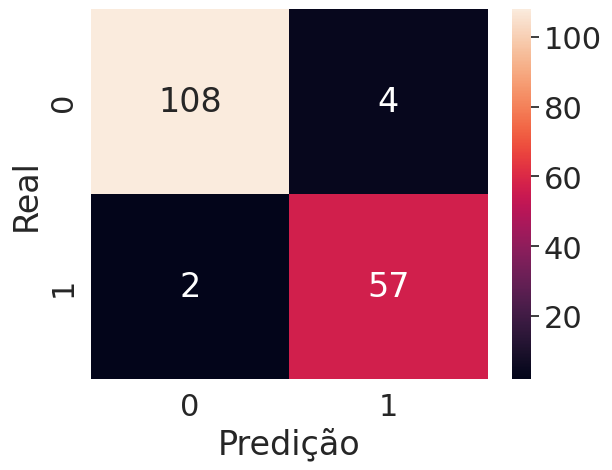

In [15]:
from sklearn.metrics import confusion_matrix

cf_model1 = confusion_matrix(test_y,classifier.predict(test_x))
cf_model2 = confusion_matrix(test_y,classifier2.predict(test2_x))

sns.set(font_scale= 2)
sns.heatmap(cf_model1, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

[Text(0.5, 5.049999999999999, 'Predição'), Text(32.25, 0.5, 'Real')]

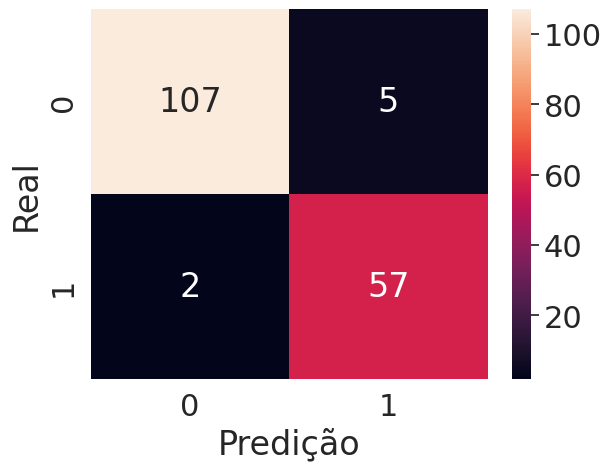

In [16]:

sns.heatmap(cf_model2, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

By eliminating the two exams that have minimal impact on the prediction while still maintaining a high level of accuracy, we can potentially reduce the cost of treatment. This frees up resources that can be redirected towards more critical areas. It is important to note that the false malignant results, although slightly increased, may not pose significant risks in this context. However, to make a conclusive decision regarding the exclusion of these exams, it would be beneficial to have additional information about the specific problem we are addressing. This information may include the potential consequences of false malignant predictions and the availability of follow-up tests or procedures in such cases.


Also, analyzing the correlation between features helps us identify redundant or overlapping information. By calculating the correlation matrix and visualizing it using a heatmap, we can quickly identify strong correlations. This allows us to make informed decisions about which features to retain and which ones can be removed without compromising the model's predictive performance.

Resultado da classificação 95.91%


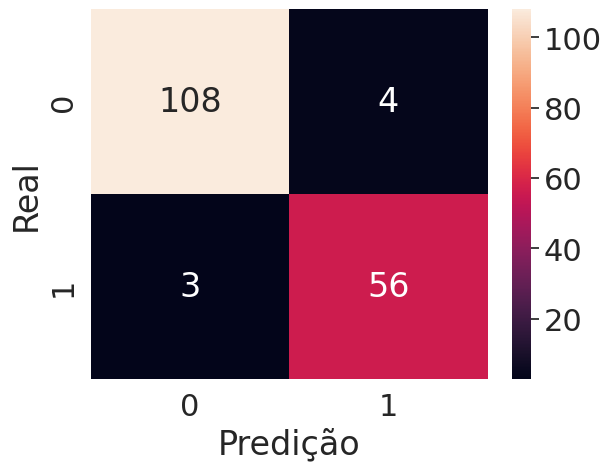

In [17]:
from sklearn.feature_selection import RFECV

SEED= 122
random.seed(SEED)

train3_x, test3_x, train_y, test_y = train_test_split(x_data3,
                                                       y_data,
                                                        test_size = 0.3)


classifier2 = RandomForestClassifier(n_estimators=100)
classifier2.fit(train3_x, train_y)
select_rfecv = RFECV(estimator = classifier2, cv = 5, step = 1, scoring="accuracy")
select_rfecv.fit(train3_x, train_y)
train_rfecv = select_rfecv.transform(train3_x)
test_rfecv = select_rfecv.transform(test3_x)
classifier2.fit(train_rfecv, train_y)

matriz_confusao = confusion_matrix(test_y,classifier2.predict(test_rfecv))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel= "Real")

print("Resultado da classificação %.2f%%" %(classifier2.score(test_rfecv,test_y)*100))

This shows that we can still if only 20 features and have the same score of the past model and improve the quantity of real malignus and real benign cancer.

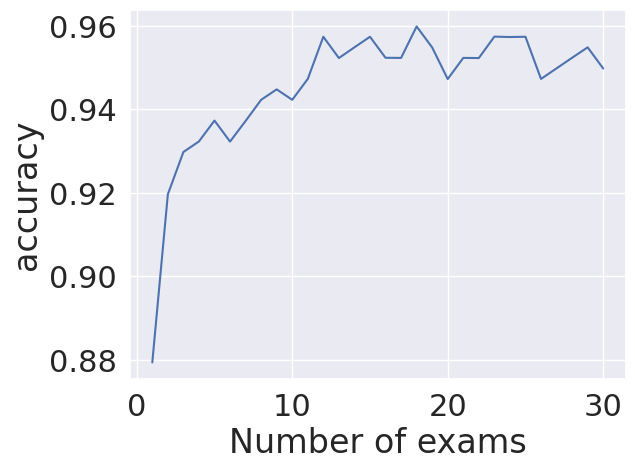

In [18]:
import matplotlib.pyplot as plt

#plt.figure(figsize = (14, 8))
plt.xlabel("Number of exams")
plt.ylabel("accuracy")
plt.plot(range(1, len(select_rfecv.cv_results_["mean_test_score"]) +1), select_rfecv.cv_results_["mean_test_score"])
plt.show()

Seen the asymptotic exponential form in accuracy graph shows that further feature reduction is possible. By selecting the most informative features, we can simplify the model without sacrificing predictive performance.


Also it is possible to measure the correletions between each feature.